<a href="https://colab.research.google.com/github/spinto88/Clases_y_tutoriales/blob/main/Sentimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis de sentimiento

En esta notebook vamos a explorar algunas herramientas para analizar la positividad o negatividad de partes de un texto.

Los algoritmos más básicos de detección de sentimiento consisten en básicamente dos enfoques:
- detectar y contar la cantidad de veces que aparecen palabras con connotación predeterminada (por ejemplo, contar la cantidad de veces que aparece la palabra *bueno* o la palabra *malo*),
- aprender la asociación entre las palabras que componen un texto y la connotación conocida (por ejemplo, a partir de la valorización dado por un usuario a un producto o película, o bien etiquetado por un experto). Si conocemos esta asociación, podemos ver que palabras aparecen en un dado texto y predecir su connotación global. Este el tipo de algortimos que vamos a utilizar.

Estos algoritmos no son infalibles pero nos dan a groso modo una idea de la tendencia de los textos analizados.

### Análisis de sentimiento en español

Vamos a utilizar la libería [*pysentimiento*](https://github.com/pysentimiento/pysentimiento) que nos permite analizar la positividad o negatividad de un texto y las emociones del mismo.

In [ ]:
# Instalamos la libería
!pip install pysentimiento
from pysentimiento import create_analyzer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=87be46745c8f3a4ddf8e2a2c9ee4d97a947d5c2473e87f5c0d4cb017a7

In [ ]:

# Creamos el objeto que nos permite analizar la positividad o negatividad de un comentario
sentiment_analyzer = create_analyzer(task="sentiment", lang="es")

In [ ]:
# Vemos las diferentes etiquetas que puede devolver
sentiment_analyzer.id2label

{0: 'NEG', 1: 'NEU', 2: 'POS'}

In [ ]:
# Probamos sobre un texto de prueba
text = 'QUE FIACA IR A VOTAR!'

prediction = sentiment_analyzer.predict(text)
print(prediction)

AnalyzerOutput(output=NEG, probas={NEG: 0.963, NEU: 0.031, POS: 0.006})


In [ ]:
# Solo el output
print(prediction.output)

NEG


#### Discurso de odio

Otra funcionalidad que tiene la librería es la de categorizar discursos racistas, xenofóbos, etc. Veamos cómo funciona:

In [ ]:
# Creamos el objeto que nos permite analizar la positividad o negatividad de un comentario
hate_analyzer = create_analyzer(task="hate_speech", lang="es")

In [ ]:
hate_analyzer.id2label

{0: 'hateful', 1: 'targeted', 2: 'aggressive'}

#### Análisis de emociones

Además podemos detectar emociones, si un comentario es triste, alegre, expresa miedo, disgusto, etc.

In [ ]:
# Creamos el objeto que nos permite analizar la emoción de una frase
emotion_analyzer = create_analyzer(task="emotion", lang="es")

In [ ]:
# Potenciales etiquetas
print(emotion_analyzer.id2label)

{0: 'others', 1: 'joy', 2: 'sadness', 3: 'anger', 4: 'surprise', 5: 'disgust', 6: 'fear'}


In [ ]:
# Texto de prueba
text = 'Hace tres días que estoy esperando el paquete de Mercado Libre!'

prediction = emotion_analyzer.predict(text)

print(prediction)

AnalyzerOutput(output=anger, probas={anger: 0.805, others: 0.065, surprise: 0.052, disgust: 0.045, fear: 0.019, sadness: 0.010, joy: 0.006})


In [ ]:
# Texto de prueba
text = 'Me saqué un 1 en el examen'

prediction = emotion_analyzer.predict(text)

print(prediction)

AnalyzerOutput(output=joy, probas={joy: 0.741, others: 0.220, surprise: 0.023, sadness: 0.006, fear: 0.005, disgust: 0.003, anger: 0.002})


### Prueba sobre un dataset real

Veamos cómo podemos utilizar los algortimos de detección de sentimiento sobre una gran cantidad de datos.
En particular vamos a analizar tweets de Argentina que contienen la palabra "Cristina" alrededor del 2 de septiembre del 2022:

In [ ]:
# Conexión con el drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

#filename = 'drive/My Drive/cristina_data.csv'
filename = 'drive/MyDrive/Datasets/cristina_data.csv'

# Leemos los datos
data = pd.read_csv(filename)
data.head()

Mounted at /content/drive


,id,created_at,text,author_id,public_metrics,entities,source,referenced_tweets,in_reply_to_user_id
0,1565851885189431297,2022-09-02T23:59:16.000Z,"De que lo estarían defendiendo, de su imperici...",1908537031,"{'retweet_count': 3, 'reply_count': 1, 'like_c...","{'urls': [{'start': 104, 'end': 127, 'url': 'h...",Twitter Web App,"[{'type': 'quoted', 'id': '1565850281853820928'}]",NaN
1,1565851728616079376,2022-09-02T23:58:38.000Z,@Guadi_Pelosista La seguridad de Cristina http...,181013249,"{'retweet_count': 2, 'reply_count': 0, 'like_c...","{'urls': [{'start': 42, 'end': 65, 'url': 'htt...",Twitter for Android,"[{'type': 'replied_to', 'id': '156579361516262...",375223674.0
2,1565851632797204480,2022-09-02T23:58:16.000Z,"""A mi me va a sobreseer la Historia, ustedes l...",236033203,"{'retweet_count': 10, 'reply_count': 1, 'like_...","{'annotations': [{'start': 90, 'end': 97, 'pro...",Twitter for Android,NaN,NaN
3,1565851590950543361,2022-09-02T23:58:06.000Z,"Feriado, finde largo y no salgo ni a la esquin...",1387469702927167494,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'annotations': [{'start': 74, 'end': 81, 'pro...",Twitter for Android,NaN,NaN
4,1565851533715148800,2022-09-02T23:57:52.000Z,En estado de alerta y movilización para cuidar...,868846147,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 138, 'end': 161, 'url': 'h...",Twitter for Android,NaN,NaN


In [ ]:
# Identificamos la columna temporal y lo ponemos como índice de nuestro dataframe
# Además ordenamos los tweets cronológicamente
data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index('created_at', inplace = True)
data.sort_index(inplace = True)
data.head()

,id,text,author_id,public_metrics,entities,source,referenced_tweets,in_reply_to_user_id
created_at,,,,,,,,
2022-09-01 00:01:29+00:00,1565127667355205632,Cristina está llorando porque le pegaron al hi...,1397779272572493836,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'annotations': [{'start': 0, 'end': 7, 'proba...",Twitter for iPhone,NaN,NaN
2022-09-01 00:01:40+00:00,1565127713513406464,"Cumpas,alguien escucho declaraciones de Chino ...",818708761946759168,"{'retweet_count': 27, 'reply_count': 24, 'like...","{'annotations': [{'start': 40, 'end': 52, 'pro...",Twitter Web App,NaN,NaN
2022-09-01 00:02:46+00:00,1565127993080647681,"@Italianoka Que cabeza de termo!!! 46,8 millon...",169973373,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'mentions': [{'start': 0, 'end': 11, 'usernam...",Twitter for Android,"[{'type': 'replied_to', 'id': '156497691171720...",893473435.0
2022-09-01 00:03:59+00:00,1565128297637453824,Las calles platenses 🇦🇷 y el cielo andan dicie...,1338687990068080640,"{'retweet_count': 16, 'reply_count': 3, 'like_...","{'hashtags': [{'start': 143, 'end': 171, 'tag'...",Twitter for Android,NaN,NaN
2022-09-01 00:04:02+00:00,1565128311629836288,🟠 Cristina recuerda que en 2014 ella devaluó y...,1212905733274001409,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'hashtags': [{'start': 105, 'end': 115, 'tag'...",dlvr.it,NaN,NaN


In [ ]:
data.shape

(3711, 8)

<Axes: xlabel='created_at'>

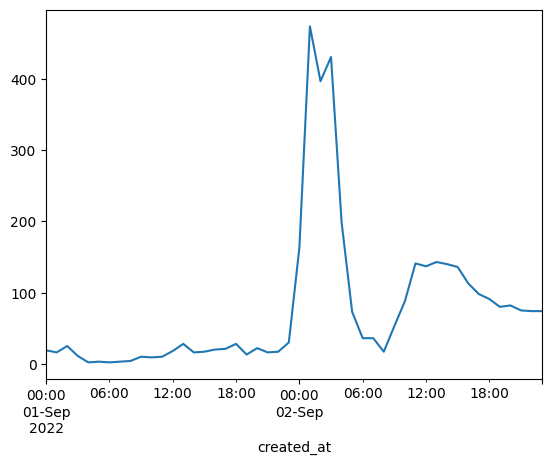

In [ ]:
# Podemos explorar la cantidad de tweets por hora
# y graficar
data.resample('1H').count()['text'].plot()

#### Prueba sobre un tweet cualquiera

In [ ]:
# Elijamos un texto al azar y analicemos con los diferentes clasificadores
indice_cualquiera = 1820
text = data.text[indice_cualquiera]
print(text)

Repudio con firmeza el hecho de violencia que sufrió la vicepresidenta de la Nación. Me solidarizo con Cristina Fernández de Kirchner, @CFKArgentina. La Justicia debe esclarecer prontamente el hecho y nuestro país superar los enfrentamientos que tan mal nos hacen.


In [ ]:
data.iloc[indice_cualquiera]

id                                                   1565549949382713345
text                   Repudio con firmeza el hecho de violencia que ...
author_id                                                     2167563964
public_metrics         {'retweet_count': 3, 'reply_count': 0, 'like_c...
entities               {'annotations': [{'start': 103, 'end': 120, 'p...
source                                               Twitter for Android
referenced_tweets                                                    NaN
in_reply_to_user_id                                                  NaN
Name: 2022-09-02 03:59:29+00:00, dtype: object

In [ ]:
print(sentiment_analyzer.predict(text))

AnalyzerOutput(output=NEG, probas={NEG: 0.946, NEU: 0.043, POS: 0.011})


In [ ]:
# Discurso de odio
print(hate_analyzer.predict(text))

AnalyzerOutput(output=[], probas={hateful: 0.013, targeted: 0.005, aggressive: 0.009})


In [ ]:
# Emoción
print(emotion_analyzer.predict(text))

AnalyzerOutput(output=anger, probas={anger: 0.772, disgust: 0.154, sadness: 0.057, others: 0.009, fear: 0.004, joy: 0.002, surprise: 0.001})


Vamos a tratar de analizar todos los tweets juntos. Para ello le pasamos todos los datos de una y el programa automáticamente los analizar por tandas (esto probablemente sea mucho más eficiente que recorrer texto a texto y hacer el análisis).
Es posible que depende de la cantidad de textos, esto pueda tardar un poco:

In [ ]:
#Primero sampleamos unos datos

data=data.sample(500,random_state=5)
data.shape

(500, 8)

In [ ]:
sentiment_predictions = sentiment_analyzer.predict(data.text)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
from collections import Counter
dict_sent = {'NEG': -1, 'NEU': 0, 'POS': 1}

data['sentiment'] = [dict_sent[s.output] for s in sentiment_predictions]

<ipython-input-45-1c884729888c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.resample('0.5H').mean()['sentiment'].plot()


<Axes: xlabel='created_at'>

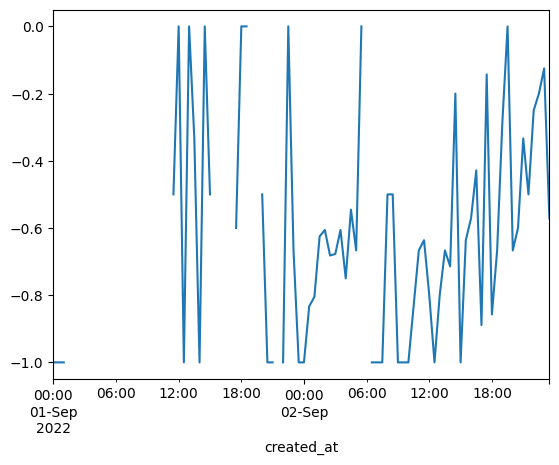

In [ ]:
data.resample('0.5H').mean()['sentiment'].plot()

Con el sentimiento de cada frase podemos estudiar la evolución temporal de estas valoraciones, si hubo períodos de positividad, negatividad, etc.

### Modelos en inglés

En general, muchos de los análisis de texto suelen funcionar mejor en inglés debido a la gran cantidad de datos y librerías disponibles.
Aquí hacemos una pequeña prueba con la librería *transformers* que vamos a ver en clases siguientes, librería que contiene los modelos que hoy son el estado del arte del análisis de procesamiento del lenguaje natural.

In [ ]:
# Librería general de modelos preentrenados
from transformers import pipeline

In [ ]:
# Nos traemos un analizador de sentimiento (baja un modelo en particular por defecto)
sentiment_classifier_en = pipeline('sentiment-analysis')

In [ ]:
text = 'A fantastic day!'

sentiment_classifier_en(text)

[{'label': 'POSITIVE', 'score': 0.999885082244873}]

In [ ]:
text = 'Un día fantástico'

sentiment_classifier_en(text)

[{'label': 'POSITIVE', 'score': 0.9992361068725586}]

In [ ]:
text = 'Um dia fantástico'

sentiment_classifier_en(text)

[{'label': 'POSITIVE', 'score': 0.9985796213150024}]